#📌 Extracão

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
#url = "/content/TelecomX_Data.json"
df = pd.read_json(url)
#df.head()

In [ ]:
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [ ]:
df.describe()

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
# Importar pandas
import pandas as pd

# Crie uma lista das colunas que você deseja normalizar
columns_to_normalize = ['customer', 'phone', 'internet', 'account']

# Crie um DataFrame vazio para armazenar os dados normalizados
df_normalized_parts = pd.DataFrame()

# Itere sobre as colunas que você quer normalizar
for col in columns_to_normalize:
    # Normalize a coluna atual. json_normalize espera uma lista de dicionários,
    # então acessamos a série correspondente à coluna e a convertemos para uma lista.
    normalized_col_df = pd.json_normalize(df[col].tolist(), sep='_')

    # Renomeie as colunas normalizadas para evitar conflitos, prefixando com o nome da coluna original
    normalized_col_df.columns = [f"{col}_{sub_col}" for sub_col in normalized_col_df.columns]

    # Concatene o DataFrame normalizado da coluna atual ao DataFrame de partes normalizadas
    df_normalized_parts = pd.concat([df_normalized_parts, normalized_col_df], axis=1)

# Crie uma lista das colunas que você não quer normalizar (as que já estão planas)
columns_to_keep = [col for col in df.columns if col not in columns_to_normalize]

# Selecione as colunas planas originais
df_flat_parts = df[columns_to_keep]

# Concatene as colunas planas originais com as partes normalizadas
df_final = pd.concat([df_flat_parts, df_normalized_parts], axis=1)

# Exiba as primeiras linhas do DataFrame final com as colunas normalizadas
df_final.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [ ]:
df_final.describe()

,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [ ]:
# Use value_counts() to count the occurrences of each unique value in the column.
# This will return a Series where the index is the unique value and the value is its count.
print(df_final['phone_PhoneService'].value_counts())

phone_PhoneService
Yes    6560
No      707
Name: count, dtype: int64


#🔧 Transformação

In [ ]:
df_final.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [ ]:
df_final.duplicated().sum()

np.int64(0)

#📊 Carga e análise

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

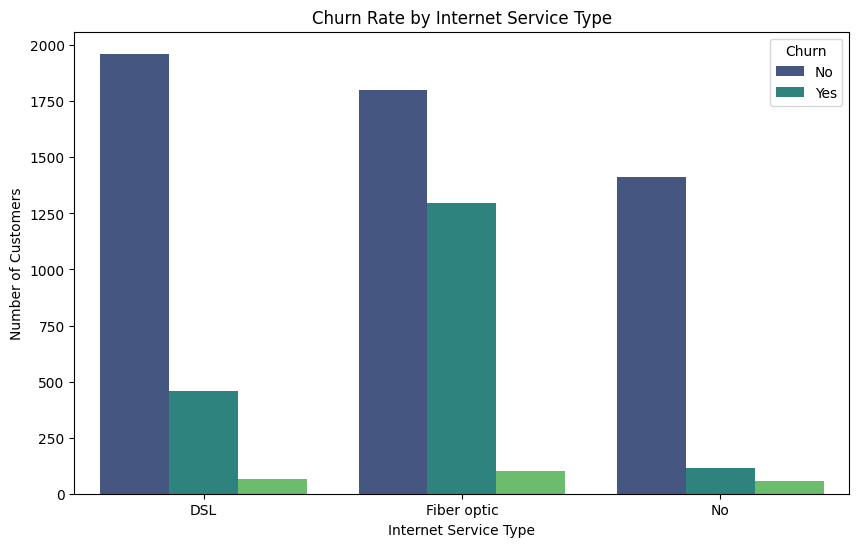

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_final, x='internet_InternetService', hue='Churn', palette='viridis')
plt.title('Churn Rate by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Number of Customers')
plt.show()

<ipython-input-22-08c4fba0e774>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='Churn', y='account_Charges_Monthly', palette='plasma')


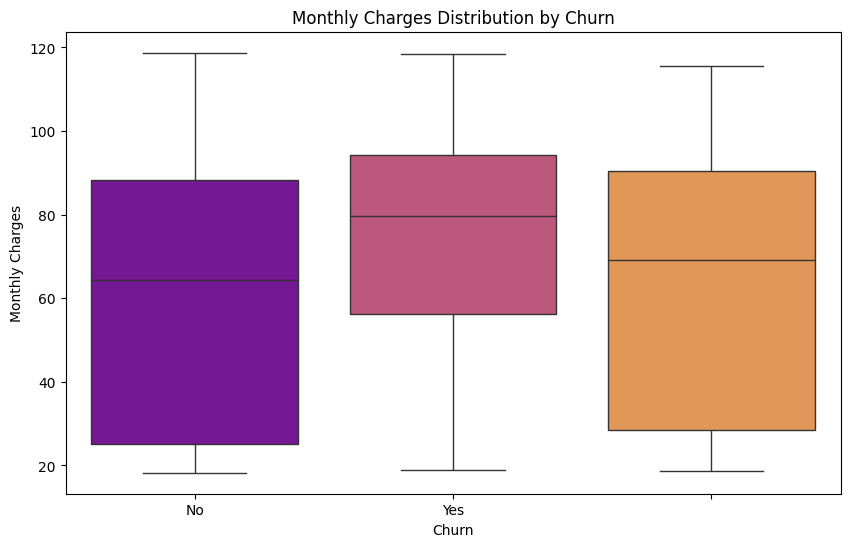

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final, x='Churn', y='account_Charges_Monthly', palette='plasma')
plt.title('Monthly Charges Distribution by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

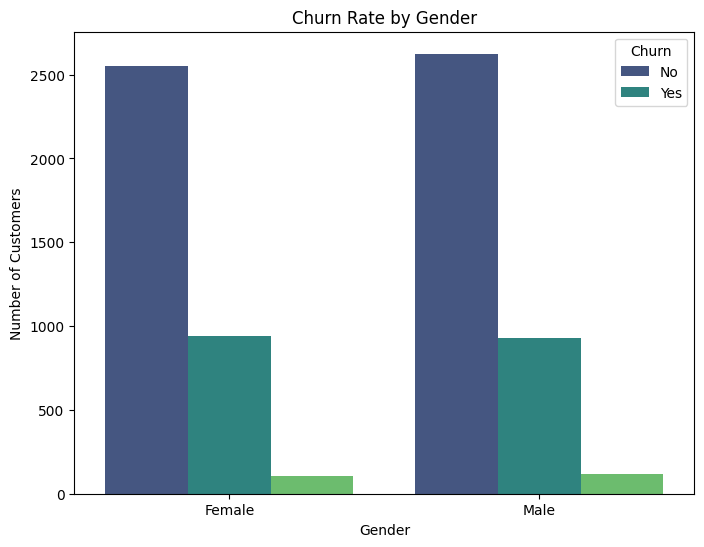

In [ ]:
plt.figure(figsize=(8, 6))
# Create a countplot showing Churn distribution for each gender
sns.countplot(data=df_final, x='customer_gender', hue='Churn', palette='viridis')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

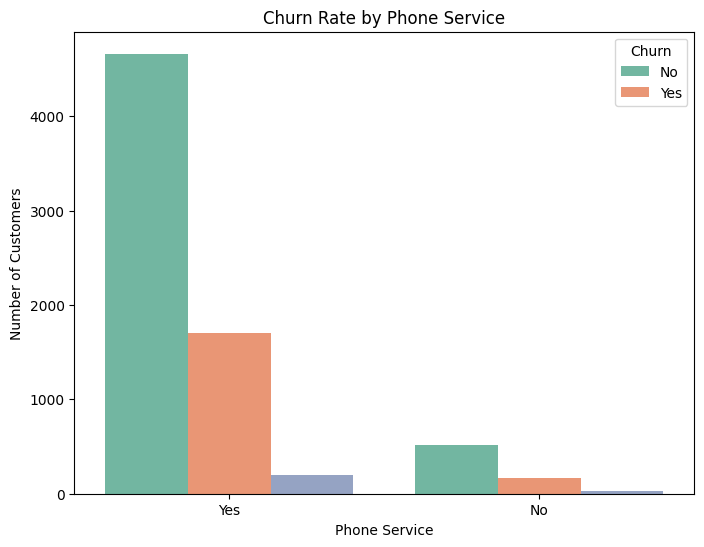

In [ ]:

plt.figure(figsize=(8, 6))
# Create a countplot showing Churn distribution for phone service
sns.countplot(data=df_final, x='phone_PhoneService', hue='Churn', palette='Set2')
plt.title('Churn Rate by Phone Service')
plt.xlabel('Phone Service')
plt.ylabel('Number of Customers')
plt.show()

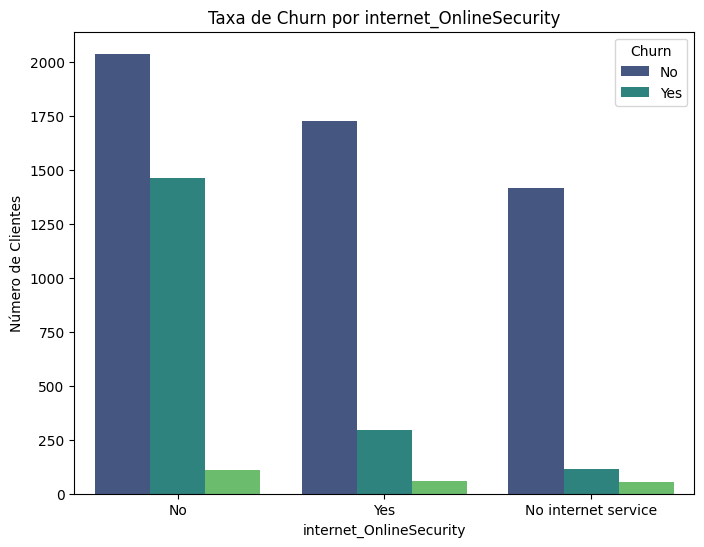

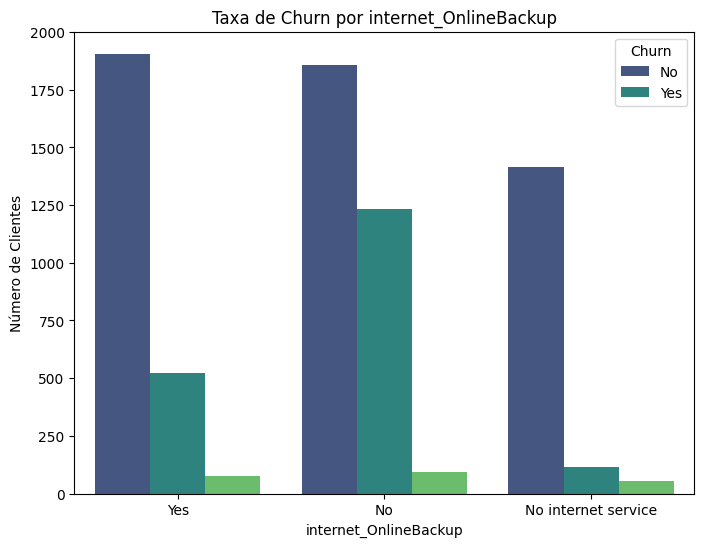

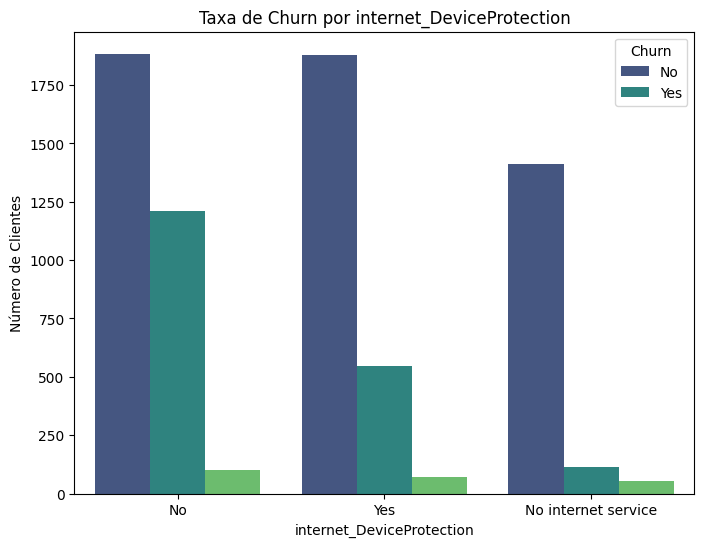

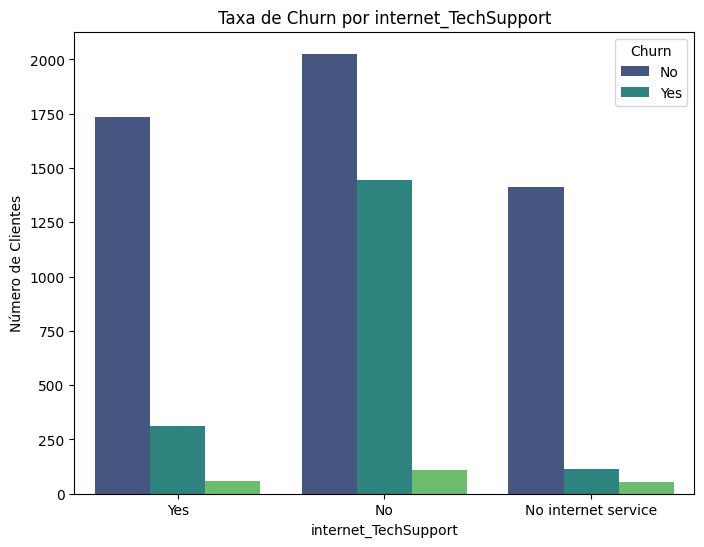

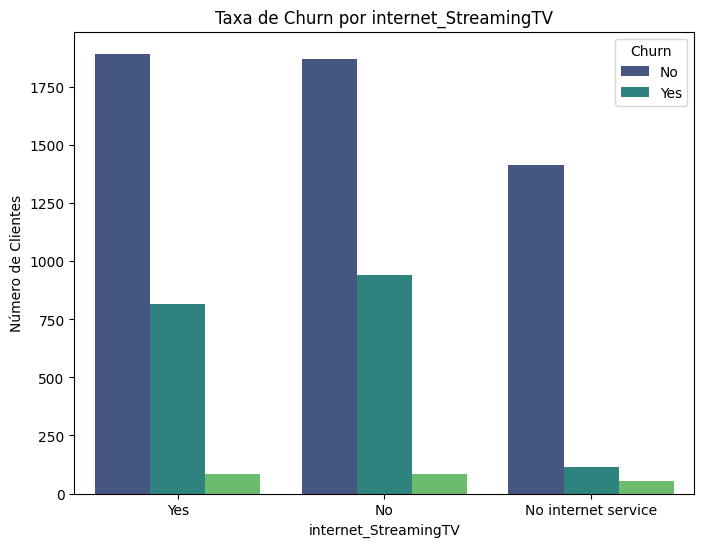

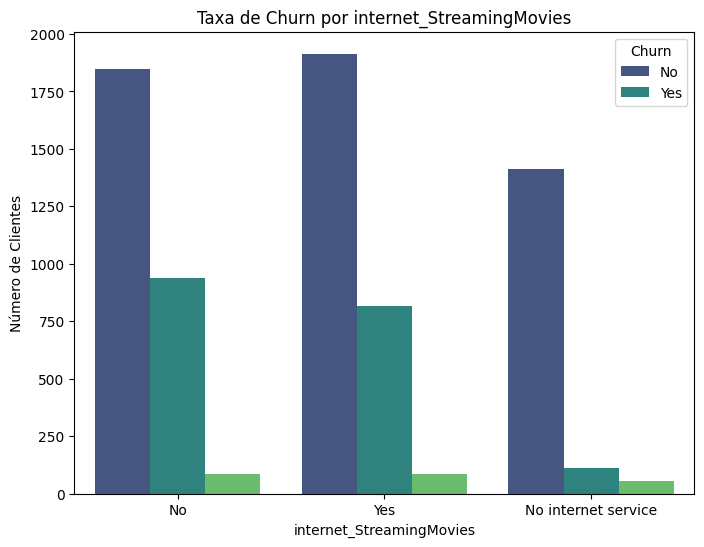

In [ ]:

# Lista de colunas de serviços adicionais de internet que você forneceu
internet_addon_columns = [
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies'
]

# Iterar sobre cada coluna e criar um countplot
for col in internet_addon_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_final, x=col, hue='Churn', palette='viridis')
    plt.title(f'Taxa de Churn por {col}') # Título do gráfico
    plt.xlabel(col) # Rótulo do eixo X
    plt.ylabel('Número de Clientes') # Rótulo do eixo Y
    plt.show()

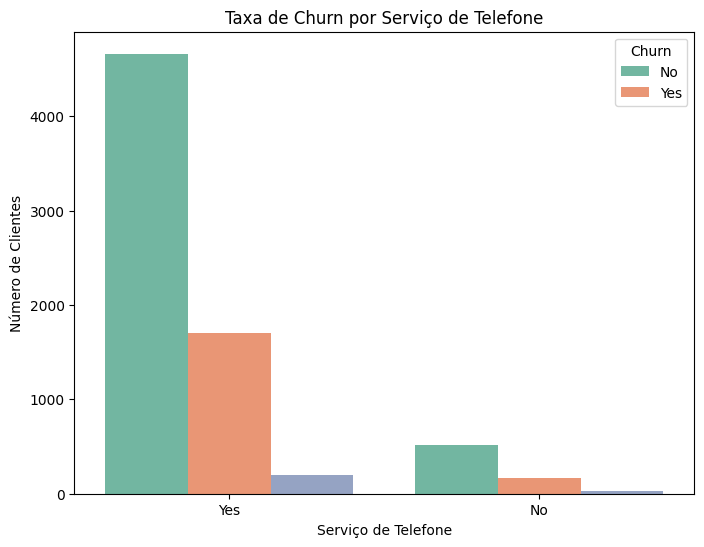

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
# Create a countplot showing Churn distribution for phone service
sns.countplot(data=df_final, x='phone_PhoneService', hue='Churn', palette='Set2')
plt.title('Taxa de Churn por Serviço de Telefone') # Título do gráfico
plt.xlabel('Serviço de Telefone') # Rótulo do eixo X
plt.ylabel('Número de Clientes') # Rótulo do eixo Y
plt.show()

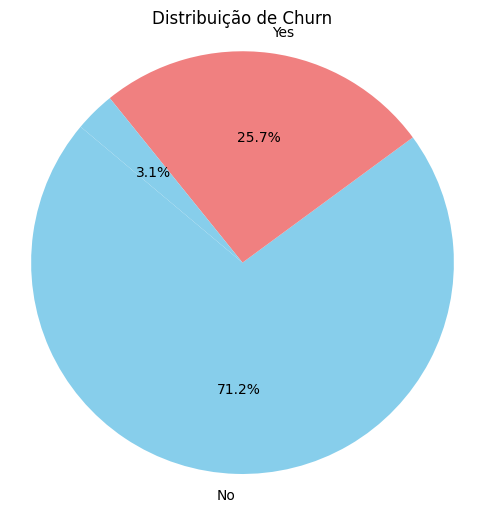

In [ ]:
import matplotlib.pyplot as plt

# Calculate the value counts for the 'Churn' column
churn_counts = df_final['Churn'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6)) # Adjust figure size as needed
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribuição de Churn') # Title of the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#📄Relatorio Final

eiros passos no projeto Telecom X

Extração:
A extração é a primeira etapa do processo ETL (Extract, Transform, Load). Ela consiste em obter os dados a partir da sua

fonte de origem. No nosso caso, importamos os dados do GitHub usando o seguinte endereço:
https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json

Para entender melhor os dados, utilizei funções como head(), info() e describe(). Essas funções ajudaram a identificar

possíveis erros ou valores ausentes, entender a distribuição das variáveis e detectar relações interessantes entre as

colunas.

Transformação:
Na etapa de transformação, utilizei funções para tratar o arquivo JSON, como:

df.isnull().sum() para verificar valores nulos em cada coluna.
df.duplicated().sum() para identificar registros duplicados.
Como havia poucos valores em branco, decidi deixar esses registros inicialmente sem alteração. Caso seja necessário, posso

preencher esses valores usando a função df.replace().

Carga e Análise (Load):
Na fase de carga, gerei diversos gráficos para analisar os dados. Notei que as informações relacionadas à evasão (Churn)

são um pouco inconclusivas. Isso porque a variável indica apenas se o cliente ainda mantém sua assinatura ou serviço em

uso, o que limita a análise sobre a saída real dos clientes.